<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/mnist_classification_advance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape,  x_test.shape, y_test.shape, 

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
 y_train[4], x_train[4]

(9, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [4]:
import matplotlib.pyplot as plt

3


(None, numpy.uint8)

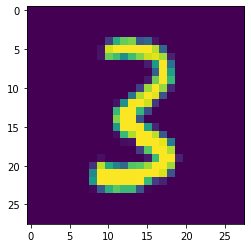

In [5]:
plt.imshow(x_train[50000])
print(y_train[50000]), type(y_train[50000])

In [36]:
x_train = x_train.reshape(-1, 28*28) / 255
x_train.shape

(60000, 784)

In [37]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [8]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [10]:
import tensorflow as tf

In [38]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784, ))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 3이상 softmax, binary -> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax')) # hidden layer

# regression -> loss : mse
# binary classification -> loss : binary crossentropy
# over 3 classification -> loss : categorical crossentropy(sparse_categorical_crossentropy)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3194 - acc: 0.9075 - val_loss: 0.1796 - val_acc: 0.9479
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1391 - acc: 0.9584 - val_loss: 0.1389 - val_acc: 0.9588
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0990 - acc: 0.9696 - val_loss: 0.1225 - val_acc: 0.9633
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0760 - acc: 0.9763 - val_loss: 0.1132 - val_acc: 0.9656
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0614 - acc: 0.9808 - val_loss: 0.1089 - val_acc: 0.9672
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0528 - acc: 0.9832 - val_loss: 0.1139 - val_acc: 0.9679
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0415 - acc: 0.9867 - val_loss: 0.1192 - val_acc: 0.9664
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [13]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
import matplotlib.pyplot as plt

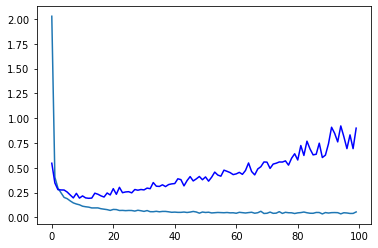

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

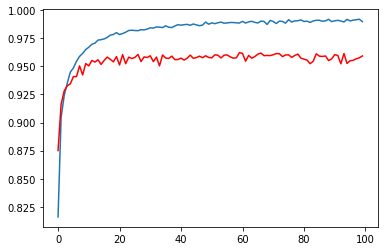

In [16]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [26]:
# y_test[30]

In [27]:
import numpy as np
np.set_printoptions(precision=8)

In [28]:
pred = model.predict(x_test[30:31])
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
a = np.arange(6).reshape(2,3) + 10
# a = np.arange(6) + 10
print(a)
np.argmax(a)

[[10 11 12]
 [13 14 15]]


5

In [32]:
np.argmax(a, axis=1)

array([2, 2])

In [34]:
np.argmax(np.array([[10, 11, 12]]), axis=1)

array([2])

In [35]:
np.argmax(pred, axis=1)

array([3])

In [40]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [41]:
model.save('./model_save01.h5')